In [2]:
import numpy as np
import pandas as pd
import seaborn as sb

Import modul-modul

In [3]:
# Membaca file .csv
df = pd.read_csv('./imdb_top_1000.csv')

Membaca dataset dan memasukan ke dataframe pandas

In [4]:
# Mengambil hanya sinopsis (Overview) dan genre
df = df[['Overview', 'Genre']]
# Memisah string genre dengan delimiter "," menjadi array of string
df['Genre'] = df['Genre'].apply(lambda x : x.split(', '))
# Filter berdasarkan panjang sinopsis
df = df[df['Overview'].apply(lambda x : len(x)) > 100]
# Menghapus karakter unicode pada sinopsis
df['Overview'] = df['Overview'].str.replace('[^\x00-\x7F]','', regex=True)

Filter berdasarkan panjang sinopsis dan menghapus karakter-karakter unicode pada sinopsis

In [5]:
df = df.reset_index()[['Overview', 'Genre']]
df.shape[0]

847

Melakukan reset index

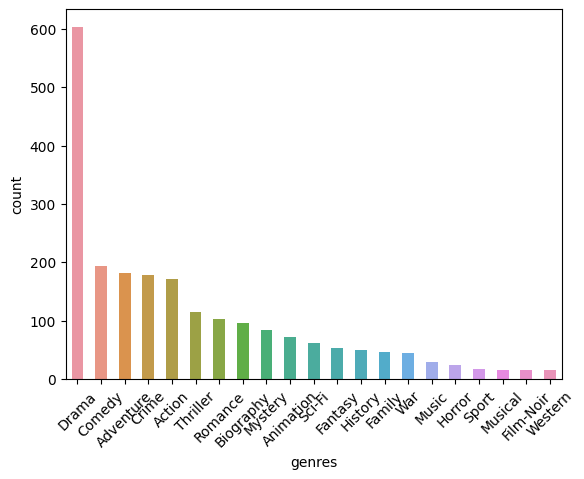

In [6]:
# Definisi fungsi untuk plotting genre
def plot_genres(genres_data):
    genres = np.unique(np.concatenate(genres_data['Genre']))
    genre_count = {genre: np.count_nonzero(np.concatenate(genres_data['Genre']) == genre) for genre in genres}

    genre_count = {
        "genres": list(genre_count.keys()),
        "count": list(genre_count.values())
    }

    genre_count = pd.DataFrame(genre_count)
    genre_count = genre_count.sort_values(by="count", ascending=False)

    genre_plot = sb.barplot(genre_count, x="genres", y="count", width=0.5)
    genre_plot.tick_params(axis="x", rotation=45)
plot_genres(df)

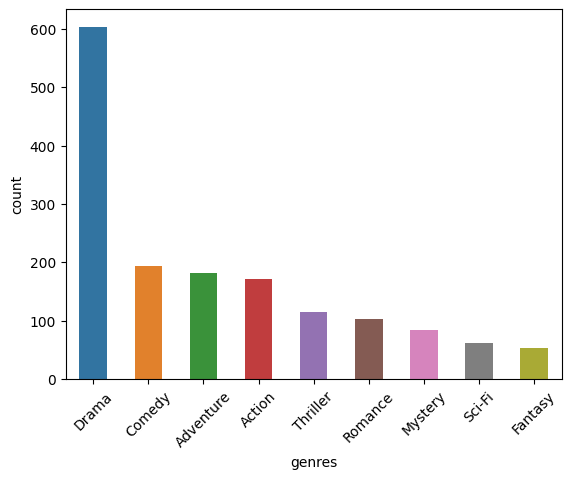

In [7]:
# List genre yang paling relevan
GENRES = ['Drama', 'Comedy', 'Adventure', 'Action', 'Thriller', 'Romance', 'Mystery', 'Sci-Fi', 'Fantasy']

# Filter array genre sesuai genre yang relevan
def filter_genres(input_genre, genre_list):
    return [genre for genre in input_genre if genre in genre_list]

df['Genre'] = df['Genre'].apply(lambda x: filter_genres(x, GENRES))
plot_genres(df)


In [10]:
df.to_json('clean.json')

In [9]:
df

,Overview,Genre
0,Two imprisoned men bond over a number of years...,[Drama]
1,An organized crime dynasty's aging patriarch t...,[Drama]
2,When the menace known as the Joker wreaks havo...,"[Action, Drama]"
3,The early life and career of Vito Corleone in ...,[Drama]
4,A jury holdout attempts to prevent a miscarria...,[Drama]
...,...,...
842,"Over two ""typical"" days in the life of The Bea...",[Comedy]
843,A young New York socialite becomes interested ...,"[Comedy, Drama, Romance]"
844,"In Hawaii in 1941, a private is cruelly punish...","[Drama, Romance]"
845,Several survivors of a torpedoed merchant ship...,[Drama]
